# User Data Analysis

## Join Data

In [4]:
import pandas as pd

df_firebase_user_survey = pd.read_excel("./data/firebase-user-survey.xlsx", index_col=0)
df_offline_user_survey = pd.read_csv("./data/survey-demographic.csv")

In [5]:
df_firebase_user_survey

,age,education_level,color_blindness,gender,visually_impaired,previous_experience_3D,job_field,free_text
0,26.0,Master's Degree,False,female,NaN,none,data science,NaN
1,7.0,NaN,False,male,-,none,school year 2,-
2,29.0,Bachelor's Degree,False,male,NaN,intermidiate,Computer Science,Really cool app for viewing and comparing the ...
3,29.0,Master's Degree,False,female,NaN,intermidiate,IT,NaN
4,20.0,Bachelor's Degree,False,male,no,none,Python ML,I am a python backend developer with experienc...
5,32.0,Master's Degree,False,male,NaN,intermidiate,Biology,NaN
6,24.0,Bachelor's Degree,False,female,NaN,none,Data Science,NaN
7,24.0,Master's Degree,False,female,myopia,none,PhD student (molecular biology_,NaN
9,37.0,Master's Degree,False,male,NaN,intermidiate,Business Analytics,NaN
10,29.0,Master's Degree,False,male,short-sighted,none,auditor,NaN


In [6]:
df_offline_user_survey

,age,gender,education_level,job_field,previous_experience_3D,color_blindness,visually_impaired
0,24,female,master,biology,limited experience,no color blindness,no visual impairments
1,61,male,master,electrical engineering,limited experience,no color blindness,no visual impairments
2,26,female,bachelor,data science,no experience,no color blindness,no visual impairments
3,25,male,bachelor,data science,limited experience,no color blindness,no visual impairments
4,23,male,high school,software engineering,limited experience,no color blindness,myopic
5,27,male,Post-Secondary Education (No Degree),IT,limited experience,no color blindness,myopic


In [34]:
def map_offline_user_survey_field_values(df: pd.DataFrame) -> pd.DataFrame:
    df_mapped = df.copy()

    df_mapped["education_level"] = (
        df_mapped["education_level"]
        .map(
            {
                "master": "Master's Degree",
                "bachelor": "Bachelor's Degree",
                "high school": "Post-Secondary Education (No Degree)",
            }
        )
        .fillna(df_mapped["education_level"])
    )

    df_mapped["previous_experience_3D"] = (
        df_mapped["previous_experience_3D"]
        .map(
            {
                "limited experience": "intermediate",
                "no experience": "none",
                "high school": "Post-Secondary Education (No Degree)",
            }
        )
        .fillna(df_mapped["previous_experience_3D"])
    )

    df_mapped["color_blindness"] = (
        df_mapped["color_blindness"]
        .map(
            {
                "no color blindness": "False",
                "color blindness": "True",
            }
        )
        .fillna(df_mapped["color_blindness"])
    )

    df_mapped["visually_impaired"] = (
        df_mapped["visually_impaired"]
        .map(
            {
                "no visual impairments": None,
            }
        )
        .fillna(df_mapped["visually_impaired"])
    )

    return df_mapped


df_offline_user_survey_mapped = map_offline_user_survey_field_values(df_offline_user_survey)

In [35]:
df_joined = pd.concat([df_firebase_user_survey, df_offline_user_survey_mapped]).reset_index()
df_joined

,index,age,education_level,color_blindness,gender,visually_impaired,previous_experience_3D,job_field,free_text
0,0,26.0,Master's Degree,False,female,NaN,none,data science,NaN
1,1,7.0,NaN,False,male,-,none,school year 2,-
2,2,29.0,Bachelor's Degree,False,male,NaN,intermidiate,Computer Science,Really cool app for viewing and comparing the ...
3,3,29.0,Master's Degree,False,female,NaN,intermidiate,IT,NaN
4,4,20.0,Bachelor's Degree,False,male,no,none,Python ML,I am a python backend developer with experienc...
5,5,32.0,Master's Degree,False,male,NaN,intermidiate,Biology,NaN
6,6,24.0,Bachelor's Degree,False,female,NaN,none,Data Science,NaN
7,7,24.0,Master's Degree,False,female,myopia,none,PhD student (molecular biology_,NaN
8,9,37.0,Master's Degree,False,male,NaN,intermidiate,Business Analytics,NaN
9,10,29.0,Master's Degree,False,male,short-sighted,none,auditor,NaN


## Age range

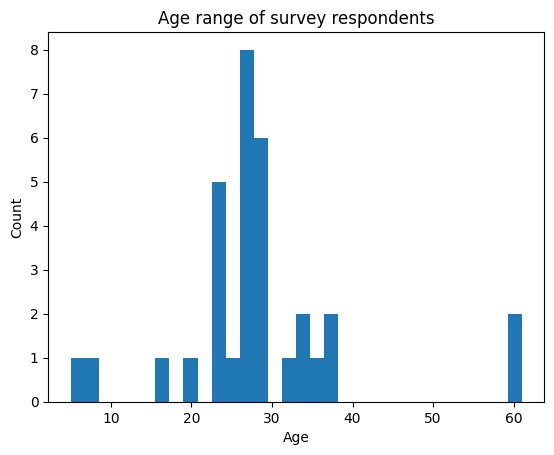

In [36]:
from matplotlib import pyplot as plt

plt.hist(df_joined["age"], bins=pd.notna(df_joined["age"]).sum())
plt.ylabel("Count")
plt.xlabel("Age")
plt.title("Age range of survey respondents")
plt.show()

In [37]:
print(f"Minimum age: {df_joined['age'].min()}")
print(f"Median age: {df_joined['age'].median()}")
print(f"Maximum age: {df_joined['age'].max()}")

Minimum age: 5.0
Median age: 27.0
Maximum age: 61.0


## Occupation examples

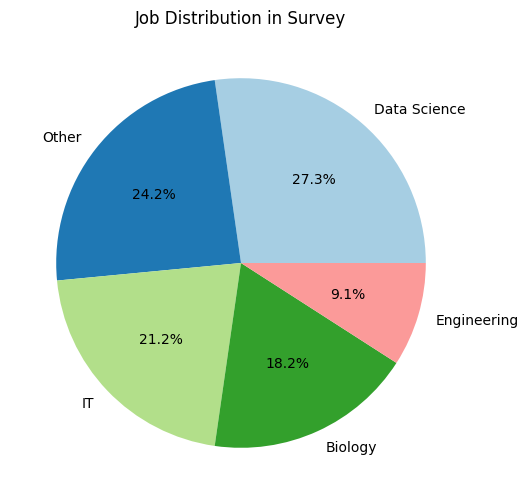

In [38]:
import numpy as np

job_mapping = {
    "IT": ["it", "system administrator", "software engineering", "computer science"],
    "Data Science": ["data science", "python ml", "business analytics"],
    "Engineering": ["engineering", "electrical engineering", "mediatechnology"],
    "Biology": [
        "biology",
        "biotech student",
        "evolutionary biologist",
        "phd student (molecular biology_",
    ],
    "Students": ["school year 2"],
    "Other": [],  # Will collect unclassified jobs
}

# Reverse mapping (fast lookup)
reverse_mapping = {
    job: category for category, jobs in job_mapping.items() for job in jobs
}

# Categorize jobs
job_categories = (
    df_joined["job_field"]
    .apply(lambda x: x.lower() if isinstance(x, str) else "Other")
    .map(reverse_mapping)
    .fillna("Other")
)


final_counts = job_categories.value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    final_counts,
    labels=final_counts.index,
    autopct="%1.1f%%",
    colors=plt.cm.Paired.colors,
)
plt.title("Job Distribution in Survey")
plt.show()

## Experience in 3D Software

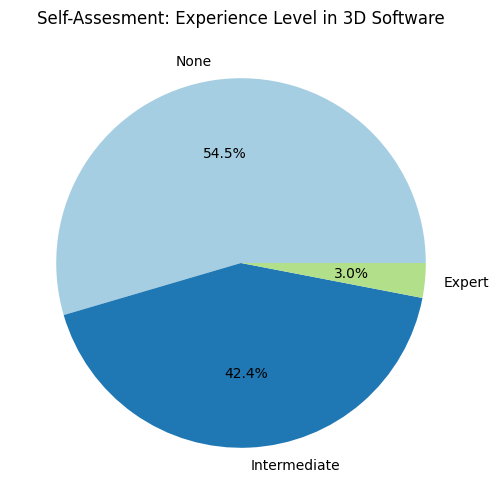

In [ ]:
experience_formatted = (
    df_joined["previous_experience_3D"]
    .map({np.nan: "none", "intermidiate": "intermediate"})
    .fillna(df_joined["previous_experience_3D"])
    .apply(lambda x: x.capitalize())
)

final_counts = experience_formatted.value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    final_counts,
    labels=final_counts.index,
    autopct="%1.1f%%",
    colors=plt.cm.Paired.colors,
)
plt.title("Self-Assesment: Experience Level in 3D Software")
plt.show()

## Gender Ratio

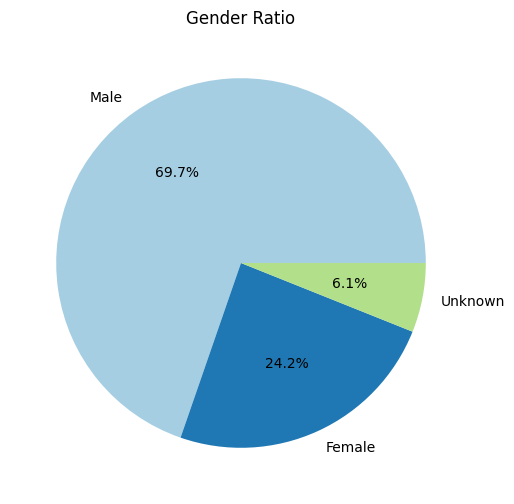

In [47]:
gender_formatted = df_joined["gender"].map({np.nan: "unknown"}).fillna(df_joined["gender"]).apply(
    lambda x: x.capitalize()
)

final_counts = gender_formatted.value_counts()
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    final_counts,
    labels=final_counts.index,
    autopct="%1.1f%%",
    colors=plt.cm.Paired.colors,
)
plt.title("Gender Ratio")
plt.show()

## Color Blindness

In [53]:
color_blindness_formatted = (
    df_joined["color_blindness"]
    .map({np.nan: "unknown"})
    .fillna(df_joined["color_blindness"])
    .apply(lambda x: x if isinstance(x, bool) else x == "True")
)
print(f"Number of color blind participants: {color_blindness_formatted.sum()}")

Number of color blind participants: 0


### Visual Impairments

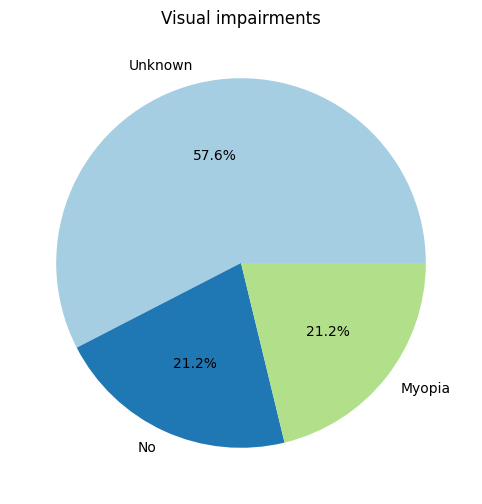

In [57]:

# Define categories
def categorize_vision(value):
    if pd.isna(value) or value in ["-", ""]:
        return "Unknown"
    elif any(keyword in value for keyword in ["myopia", "myopic", "short-sighted", "shortsighted", "glasses"]):
        return "Myopia"
    elif any(keyword in value for keyword in ["no", "no visual impairments"]):
        return "No"
    else:
        return "Unknown"

# Apply categorization
vision = df_joined["visually_impaired"].apply(categorize_vision)

final_counts = vision.value_counts()
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    final_counts,
    labels=final_counts.index,
    autopct="%1.1f%%",
    colors=plt.cm.Paired.colors,
)
plt.title("Visual impairments")
plt.show()

## Total number of survey participants that used survey form?

In [58]:
print(f"The total number of users that also reponded to the survey form is {df_joined.shape[0]}")

The total number of users that also reponded to the survey form is 33
